In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.utilities.lambdify import lambdify


In [15]:
alpha = 3/2

# get the integral using sympy
x = sp.Symbol('x')
fx = alpha / (x**(alpha+1))
print("Pareto PDF: {}".format(fx))
Fx = sp.integrate(fx, (x, 1, x))
print("Pareto CDF: {}".format(Fx))
# func_pdf = lambdify(x, fx)  # convert pdf into a numerical function
# func_cdf = lambdify(x, Fx)  # convert cdf into a numerical function


# define the function
def pareto_pdf(x):
    if x < 1:
        return 0
    else:
        return alpha / (x**(alpha+1))


def pareto_cdf(x):
    if x < 1:
        return 0
    else:
        return 1 - (1 / (x**1.5))


def func_inv(xvals: np.ndarray, cdf_vals: np.ndarray, u: np.ndarray) -> np.ndarray:
    """A function to compute the inverse cdf from a discrete set of values

    Args:

        xvals: (N, ) array of locations at which cdf_vals is obtained (sorted)
        cdf_vals: (N, ) array of values of the cdf (sorted)
        u: (M, )Locations at which to evaluate the inverse CDF. an array of numbers between 0 and 1.

    Returns:
        ret: (M, ) array of locations of the inverse CDF
    """

    assert np.all(u < 1) and np.all(u > 0)

    M = u.shape[0]
    ret = np.zeros((M))
    for jj in range(M):
        inds = (cdf_vals - u[jj] > 0).nonzero()
        ret[jj] = xvals[inds[0][0]]
    return ret

Pareto PDF: 1.5/x**2.5
Pareto CDF: 1.0 - 1.0/x**1.5


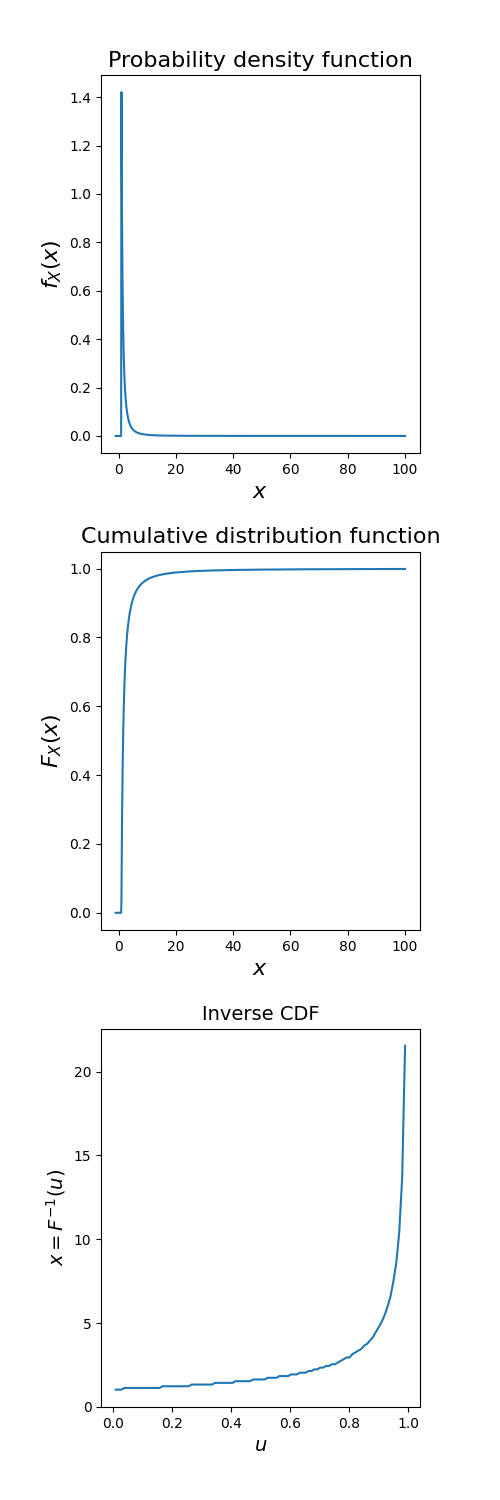

In [20]:
# plot the function over a range of x values

# upper limit here should be high enough so the CDF reaches the upper limit of us linspace
x = np.linspace(-1, 100, 1000)
us = np.linspace(0.01, 0.99, 100)
pdf = np.array([pareto_pdf(i) for i in x])
cdf = np.array([pareto_cdf(i) for i in x])
xs = func_inv(x, cdf, us)

fig, axs = plt.subplots(3, 1, figsize=(5, 15))
fig.tight_layout(h_pad=5)
axs[0].plot(x, pdf)
axs[0].set_xlabel(r'$x$', fontsize=16)
axs[0].set_ylabel(r'$f_X(x)$', fontsize=16)
axs[0].set_title('Probability density function', fontsize=16)

axs[1].plot(x, cdf)
axs[1].set_xlabel(r'$x$', fontsize=16)
axs[1].set_ylabel(r'$F_X(x)$', fontsize=16)
axs[1].set_title('Cumulative distribution function', fontsize=16)

axs[2].plot(us, xs)
axs[2].set_xlabel(r'$u$', fontsize=14)
axs[2].set_ylabel(r'$x = F^{-1}(u)$', fontsize=14)
axs[2].set_title('Inverse CDF', fontsize=14)

plt.show()